Здесь будут удалены признаки PassengerId, Ticket, Cabin. Также будут введены вместо SibSp, Parch СТОЛБЕЦ Quantity_r - общее количество родственников - и вместо Name столбец Type - Mrs, Mr, Miss, Master, Rav, Dr. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Подготовка данных

Удалим из данных ненужные столбцы

In [3]:
a = ["PassengerId", "Ticket", "Cabin"]
train.drop(a, axis = 1, inplace = True)
test.drop(a, axis = 1, inplace = True)

Вместо SibSp, Parch вводим столбец Quantity_r

In [4]:
train["Quantity_r"] = pd.Series(train["Parch"] + train["SibSp"], 
                            index=train.index)
test["Quantity_r"] = pd.Series(test["Parch"] + test["SibSp"], 
                            index=test.index)

In [5]:
a = ["Parch", "SibSp"]
train.drop(a, axis = 1, inplace = True)
test.drop(a, axis = 1, inplace = True)

Вводим столбец Type:

In [6]:
train.loc[train["Name"].str.find("Mr.") != -1, "Type"] = "Mr"
train.loc[train["Name"].str.find("Sir.") != -1, "Type"] = "Mr"

train.loc[train["Name"].str.find("Mrs.") != -1, "Type"] = "Mrs"
train.loc[train["Name"].str.find("Mme.") != -1, "Type"] = "Mrs"
train.loc[train["Name"].str.find("Lady.") != -1, "Type"]= "Mrs"
train.loc[train["Name"].str.find("Countess.") != -1, "Type"]= "Mrs"

train.loc[ train["Name"].str.find("Miss.") != -1 , "Type"]= "Miss"
train.loc[ train["Name"].str.find("Ms.") != -1, "Type"]= "Miss"
train.loc[ train["Name"].str.find("Mlle.") != -1, "Type"]= "Miss"

train.loc[train["Name"].str.find("Master.") != -1, "Type"] = "Master"
train.loc[train["Name"].str.find("Rev.") != -1, "Type"] = "Rev"
train.loc[train["Name"].str.find("Dr.") != -1, "Type"] = "Dr"

In [7]:
train[train['Type'].isnull()]

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Quantity_r,Type
30,0,1,"Uruchurtu, Don. Manuel E",male,40.0,27.7208,C,0,NaN
449,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,30.5000,S,0,NaN
536,0,1,"Butt, Major. Archibald Willingham",male,45.0,26.5500,S,0,NaN
647,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,35.5000,C,0,NaN
694,0,1,"Weir, Col. John",male,60.0,26.5500,S,0,NaN
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,71.0000,S,2,NaN
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0.0000,S,0,NaN


В остаток запишем Mr.

In [8]:
train["Type"] = train["Type"].fillna("Mr")
train[train['Type'].isnull()]

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Quantity_r,Type


In [9]:
test.loc[test["Name"].str.find("Mr.") != -1, "Type"] = "Mr"
test.loc[test["Name"].str.find("Sir.") != -1, "Type"] = "Mr"

test.loc[test["Name"].str.find("Mrs.") != -1, "Type"] = "Mrs"
test.loc[test["Name"].str.find("Mme.") != -1, "Type"] = "Mrs"
test.loc[test["Name"].str.find("Lady.") != -1, "Type"]= "Mrs"
test.loc[test["Name"].str.find("Countess.") != -1, "Type"]= "Mrs"

test.loc[ test["Name"].str.find("Miss.") != -1 , "Type"]= "Miss"
test.loc[ test["Name"].str.find("Ms.") != -1, "Type"]= "Miss"
test.loc[ test["Name"].str.find("Mlle.") != -1, "Type"]= "Miss"

test.loc[test["Name"].str.find("Master.") != -1, "Type"] = "Master"
test.loc[test["Name"].str.find("Rev.") != -1, "Type"] = "Rev"
test.loc[test["Name"].str.find("Dr.") != -1, "Type"] = "Dr"

In [10]:
test[test['Type'].isnull()]

,Pclass,Name,Sex,Age,Fare,Embarked,Quantity_r,Type
131,1,"Gracie, Col. Archibald IV",male,53.0,28.500,C,0,NaN
202,1,"Astor, Col. John Jacob",male,47.0,227.525,C,1,NaN
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.900,C,0,NaN


In [11]:
test.loc[test["Name"].str.find("Dona.") != -1, "Type"]= "Mrs"
test["Type"] = test["Type"].fillna("Mr")
test[test['Type'].isnull()]

,Pclass,Name,Sex,Age,Fare,Embarked,Quantity_r,Type


Проверка пропущенных значений.

In [12]:
train.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           177
Fare            0
Embarked        2
Quantity_r      0
Type            0
dtype: int64

In [13]:
train["Embarked"] = train["Embarked"].fillna("S")
train["Age"] = train["Age"].fillna((train["Age"].mean()))

In [14]:
test.isnull().sum()

Pclass         0
Name           0
Sex            0
Age           86
Fare           1
Embarked       0
Quantity_r     0
Type           0
dtype: int64

In [15]:
test['Fare'] = test['Fare'].fillna((test['Fare'].mean()))
test["Age"] = test["Age"].fillna((test["Age"].mean()))

Заменяем female на 0, male - на 1.  
Заменяем S на 2, Q - на 1, C - на 0.   
Заменяем Mr на 0, Mrs - на 1, Miss - на 2, Master - на 3, Rev - на 4, Dr - на 5

In [17]:
train["Sex"] = train["Sex"].map({'female': 0, 'male': 1})
test["Sex"] = test["Sex"].map({'female': 0, 'male': 1})

train["Embarked"] = train["Embarked"].map({'S': 2, 'Q': 1, 'C': 0})
test["Embarked"] = test["Embarked"].map({'S': 2, 'Q': 1, 'C': 0})

train["Type"] = train["Type"].map({'Mr': 0, 'Mrs': 1, "Miss": 2, "Master": 3, "Rev": 4, "Dr": 5})
test["Type"] = test["Type"].map({'Mr': 0, 'Mrs': 1, "Miss": 2, "Master": 3, "Rev": 4, "Dr": 5})

In [18]:
train.drop("Name", axis = 1, inplace = True)
test.drop("Name", axis = 1, inplace = True)

In [19]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Quantity_r,Type
0,0,3,1,22.0,7.2500,2,1,0
1,1,1,0,38.0,71.2833,0,1,1
2,1,3,0,26.0,7.9250,2,0,2
3,1,1,0,35.0,53.1000,2,1,1
4,0,3,1,35.0,8.0500,2,0,0


In [20]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Quantity_r,Type
0,3,1,34.5,7.8292,1,0,0
1,3,0,47.0,7.0000,2,1,1
2,2,1,62.0,9.6875,1,0,0
3,3,1,27.0,8.6625,2,0,0
4,3,0,22.0,12.2875,2,2,1


Разделяем данные

In [21]:
X = train.iloc[:, 1:8].values
Y = train.iloc[:, 0].values

In [22]:
X

array([[ 3.        ,  1.        , 22.        , ...,  2.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.        , 38.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 3.        ,  0.        , 26.        , ...,  2.        ,
         0.        ,  2.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765, ...,  2.        ,
         3.        ,  2.        ],
       [ 1.        ,  1.        , 26.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  1.        , 32.        , ...,  1.        ,
         0.        ,  0.        ]])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4, random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(534, 7) (357, 7) (534,) (357,)


#### KNN

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

Проводим масштабирование данных и посмотрим результаты обучения для моделей с числом соседей от 1 до 15

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
kk = range(1, 15)

scores = []
err_train = []
err_test = []

for k in kk:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    err_train.append(np.mean(knn.predict(X_train) != y_train))
    err_test.append(np.mean(knn.predict(X_test) != y_test))

In [27]:
print("Доля правильно спрогнозированных выборок \n", scores)

Доля правильно спрогнозированных выборок 
 [0.7843137254901961, 0.7955182072829131, 0.8263305322128851, 0.834733893557423, 0.8319327731092437, 0.84593837535014, 0.8291316526610645, 0.8319327731092437, 0.834733893557423, 0.8515406162464986, 0.834733893557423, 0.8431372549019608, 0.8291316526610645, 0.8291316526610645]


(15, 0)

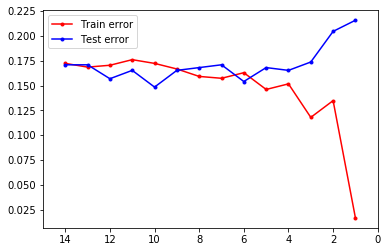

In [28]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.xlim([15, 0])

In [29]:
print(min(err_test))
print(kk[err_test.index(min(err_test))])
print(scores[kk[err_test.index(min(err_test))]])

0.1484593837535014
10
0.834733893557423


Наиболее хороший результат дает обучение с 10 сеседями.
Оценка алогитма:

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       234
           1       0.90      0.64      0.75       123

    accuracy                           0.85       357
   macro avg       0.87      0.80      0.82       357
weighted avg       0.86      0.85      0.84       357

[[225   9]
 [ 44  79]]


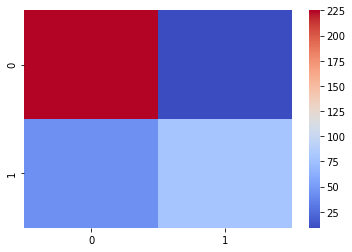

In [31]:
knn1 = KNeighborsClassifier(n_neighbors=kk[err_test.index(min(err_test))])
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = knn1.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="coolwarm");

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Средняя абсолютная ошибка', mean_absolute_error(y_test, y_pred))
print('Среднеквадратическая ошибка', mean_squared_error(y_test, y_pred))

rez = []
rez = [accuracy_score(y_test, y_pred)]

Средняя абсолютная ошибка 0.1484593837535014
Среднеквадратическая ошибка 0.1484593837535014


#### Логистическая регрессия

Обучение:

In [34]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression()
lrg.fit(X_train, y_train)

LogisticRegression()

Оценка алгоритма:

In [35]:
y_pred = lrg.predict(X_test)
err_train_lrg = np.mean(lrg.predict(X_train) != y_train)
err_test_lrg = np.mean(lrg.predict(X_test) != y_test)
print("Доля правильно спрогнозированных выборок:", accuracy_score(y_test, y_pred))
print("error_train =", err_train_lrg)
print("error_test =", err_test_lrg)

Доля правильно спрогнозированных выборок: 0.834733893557423
error_train = 0.21161048689138576
error_test = 0.16526610644257703


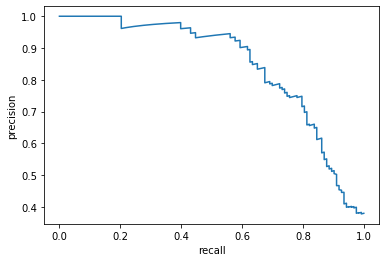

In [36]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, lrg.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       234
           1       0.78      0.73      0.75       123

    accuracy                           0.83       357
   macro avg       0.82      0.81      0.81       357
weighted avg       0.83      0.83      0.83       357

[[208  26]
 [ 33  90]]


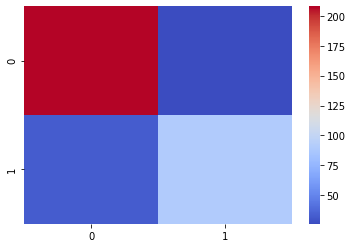

In [36]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="coolwarm");

In [37]:
print('Средняя абсолютная ошибка', mean_absolute_error(y_test, y_pred))
print('Среднеквадратическая ошибка', mean_squared_error(y_test, y_pred))
rez.append(accuracy_score(y_test, y_pred))

Средняя абсолютная ошибка 0.16526610644257703
Среднеквадратическая ошибка 0.16526610644257703


#### Дерево решений

Сначала посмотрим наилучший результат для разной глубины

In [38]:
from sklearn import tree

scores1 = []
err_train1 = []
err_test1 = []

kk1 = range(1, 10)
for max_depth in kk1:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores1.append(accuracy_score(y_test, y_pred))
    err_train1.append(np.mean(clf.predict(X_train) != y_train))
    err_test1.append(np.mean(clf.predict(X_test) != y_test))   

In [39]:
print("Доля правильно спрогнозированных выборок \n", scores1)

Доля правильно спрогнозированных выборок 
 [0.7983193277310925, 0.7983193277310925, 0.8571428571428571, 0.8543417366946778, 0.8487394957983193, 0.7983193277310925, 0.8151260504201681, 0.8235294117647058, 0.8235294117647058]


(15, 0)

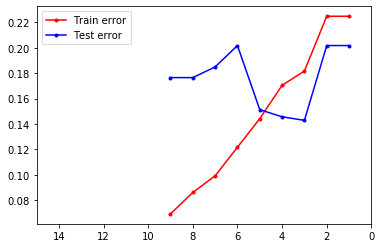

In [40]:
plt.plot(kk1, err_train1, '.-r', label = 'Train error')
plt.plot(kk1, err_test1,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.xlim([15, 0])

In [41]:
print(min(err_test1))
print(kk1[err_test1.index(min(err_test1))])
print(scores1[kk1[err_test1.index(min(err_test1))]])

0.14285714285714285
3
0.8543417366946778


Наилучший результат достигается при max_depth = 3.
Теперь для максимального числа признаков:

In [43]:
scores = []

kk = range(1, 8)
for i in kk:
    clf = tree.DecisionTreeClassifier(max_depth=3, max_features = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
print(scores)
print(scores.index(max(scores)), " : ", max(scores))

[0.6470588235294118, 0.7815126050420168, 0.84593837535014, 0.8487394957983193, 0.8515406162464986, 0.8515406162464986, 0.8571428571428571]
6  :  0.8571428571428571


Наилучший результат: max_depth = 3, max_features = 6.
Оценка алгоритма:

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       234
           1       0.84      0.72      0.78       123

    accuracy                           0.86       357
   macro avg       0.85      0.83      0.84       357
weighted avg       0.86      0.86      0.85       357

[[217  17]
 [ 34  89]]


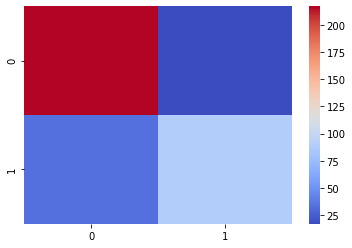

In [44]:
clf1 = tree.DecisionTreeClassifier(max_depth=3, max_features = 6)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="coolwarm");
rez.append(accuracy_score(y_test, y_pred))

In [45]:
# правила дерева решений
text_representation = tree.export_text(clf1)
print(text_representation)

|--- feature_6 <= -0.29
|   |--- feature_3 <= -0.12
|   |   |--- feature_3 <= -0.47
|   |   |   |--- class: 0
|   |   |--- feature_3 >  -0.47
|   |   |   |--- class: 0
|   |--- feature_3 >  -0.12
|   |   |--- feature_2 <= -0.40
|   |   |   |--- class: 0
|   |   |--- feature_2 >  -0.40
|   |   |   |--- class: 0
|--- feature_6 >  -0.29
|   |--- feature_0 <= 0.25
|   |   |--- feature_6 <= 2.51
|   |   |   |--- class: 1
|   |   |--- feature_6 >  2.51
|   |   |   |--- class: 0
|   |--- feature_0 >  0.25
|   |   |--- feature_5 <= 1.78
|   |   |   |--- class: 1
|   |   |--- feature_5 >  1.78
|   |   |   |--- class: 0



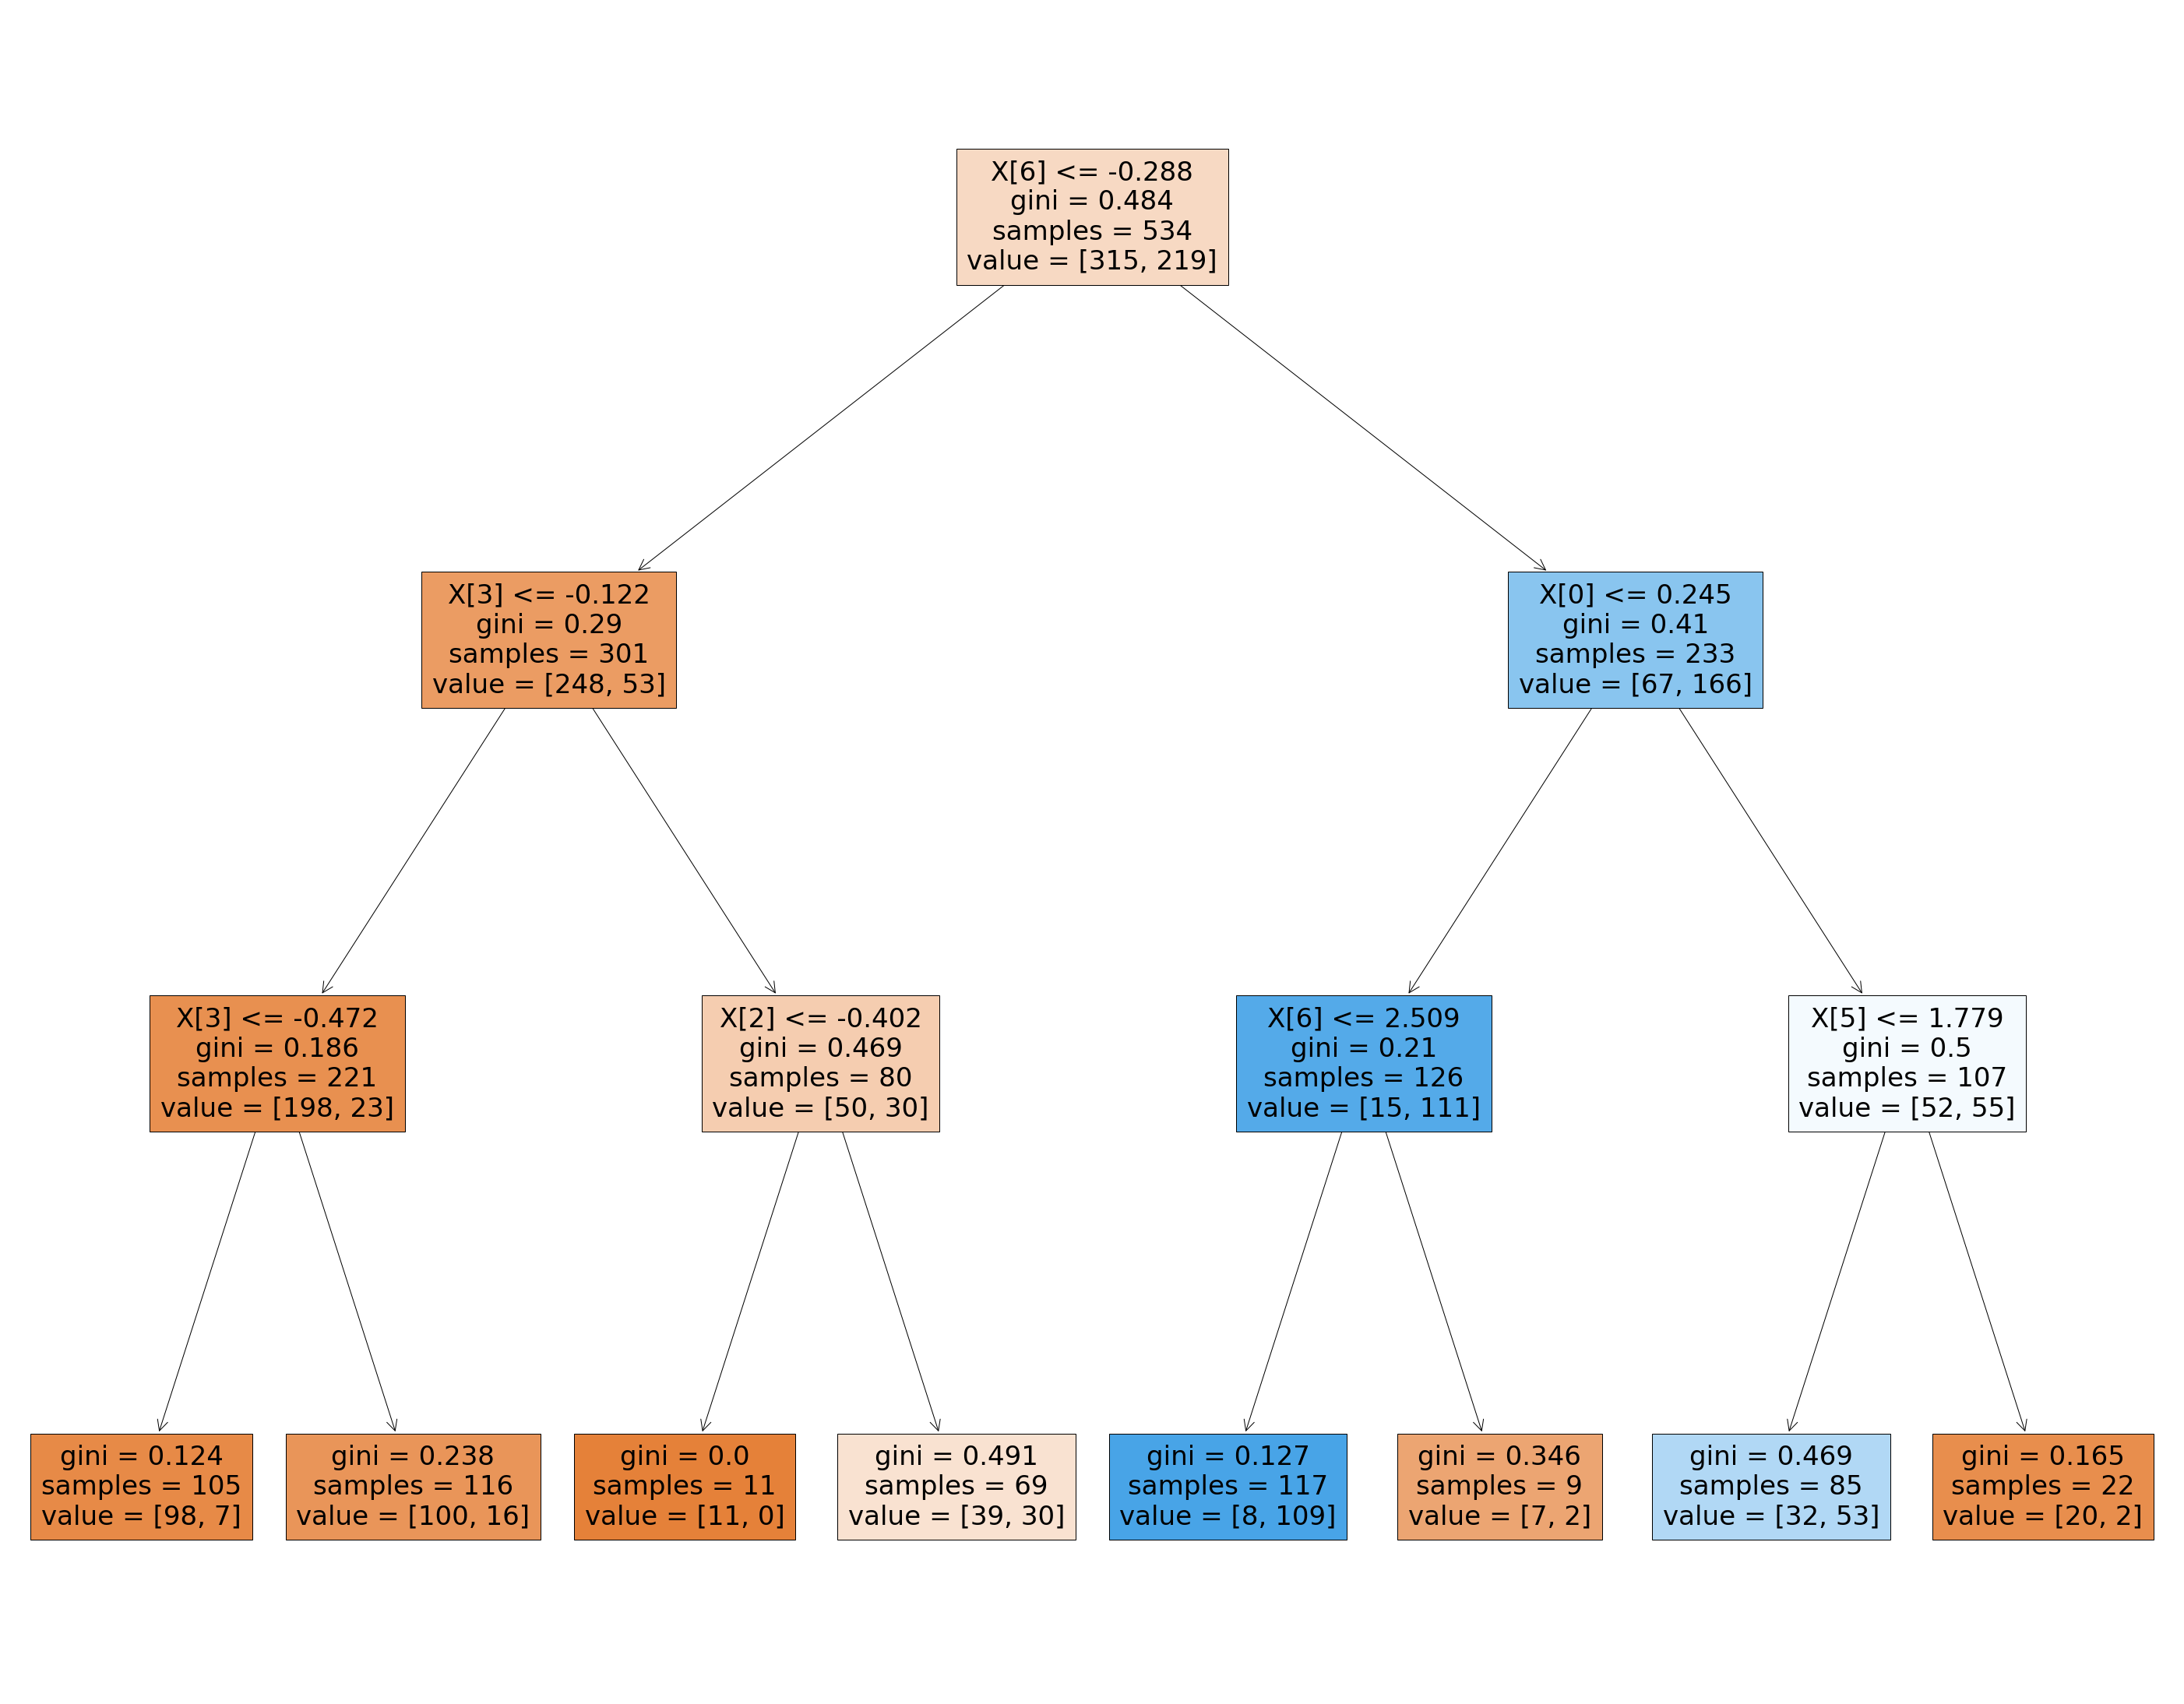

In [46]:
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf1, filled=True);

#### Случайный лес

In [54]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

Эффективность по количеству деревьев


In [55]:
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

cross_ = []
scores_rfc = []
trees_grid = range(45, 60)

for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, oob_score=True,  
                                 random_state=1,  n_jobs=-1) 
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    a_ = accuracy_score(y_test, y_pred)
    scores_rfc.append(a_)
    print(ntrees, " : ", a_)
print("Max:" , trees_grid[scores_rfc.index(max(scores_rfc))], " : ", max(scores_rfc))

45  :  0.8095238095238095
46  :  0.8123249299719888
47  :  0.8151260504201681
48  :  0.8179271708683473
49  :  0.8151260504201681
50  :  0.8151260504201681
51  :  0.8179271708683473
52  :  0.8123249299719888
53  :  0.8095238095238095
54  :  0.8179271708683473
55  :  0.8207282913165266
56  :  0.8179271708683473
57  :  0.8179271708683473
58  :  0.8179271708683473
59  :  0.8179271708683473
Max: 55  :  0.8207282913165266


Лучший результат - n_estimators = 55.
Эффективность по глубине:


In [56]:
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
cross_ = []
scores_rfc = []

for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=55,  oob_score=True,  
                                 random_state=1,  n_jobs=-1, 
                                 max_depth = max_depth) 
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    a_ = accuracy_score(y_test, y_pred)
    scores_rfc.append(a_)
    print(max_depth, " : ", a_)
print("Max: ", max_depth_grid[scores_rfc.index(max(scores_rfc))], " : ", max(scores_rfc))

3  :  0.8543417366946778
5  :  0.8431372549019608
7  :  0.84593837535014
9  :  0.8291316526610645
11  :  0.8207282913165266
13  :  0.803921568627451
15  :  0.8179271708683473
17  :  0.8179271708683473
20  :  0.8207282913165266
22  :  0.8207282913165266
24  :  0.8207282913165266
Max:  3  :  0.8543417366946778


Лучший результат - при max_depth = 3.
Минимальное количество выборок, которое требуется для конечного узла.

In [57]:
min_samples_leaf_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
cross_ = []
scores_rfc = []

for i in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=55,  oob_score=True,  
                                 random_state=1,  n_jobs=-1, 
                                 max_depth = 3, min_samples_leaf = i) 
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    a_ = accuracy_score(y_test, y_pred)
    scores_rfc.append(a_)
    print(i, " : ", a_)
print("Min: ", min_samples_leaf_grid[scores_rfc.index(max(scores_rfc))], " : ", max(scores_rfc))

3  :  0.8515406162464986
5  :  0.8403361344537815
7  :  0.8375350140056023
9  :  0.8319327731092437
11  :  0.8235294117647058
13  :  0.8291316526610645
15  :  0.8151260504201681
17  :  0.8095238095238095
20  :  0.803921568627451
22  :  0.8095238095238095
24  :  0.8095238095238095
Min:  3  :  0.8515406162464986


min_samples_leaf ухудшает результаты.
Максимальное число признаков:

In [58]:
max_features_grid = range(1, 8)
cross_ = []
scores_rfc = []

for i in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=48,  oob_score=True,  
                                 random_state=1,  n_jobs=-1, 
                                 max_depth = 17, max_features = i) 
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    a_ = accuracy_score(y_test, y_pred)
    scores_rfc.append(a_)
    print(i, " : ", a_)
print("Max_features: ", max_features_grid[scores_rfc.index(max(scores_rfc))], " : ", max(scores_rfc))

1  :  0.8095238095238095
2  :  0.8179271708683473
3  :  0.8095238095238095
4  :  0.8291316526610645
5  :  0.8235294117647058
6  :  0.8179271708683473
7  :  0.8319327731092437
Max_features:  7  :  0.8319327731092437


Таким образом, наилучший результат:

Accuracy_score =  0.8543417366946778
Средняя абсолютная ошибка 0.14565826330532214
Среднеквадратическая ошибка 0.14565826330532214
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       234
           1       0.84      0.72      0.77       123

    accuracy                           0.85       357
   macro avg       0.85      0.82      0.83       357
weighted avg       0.85      0.85      0.85       357

[[217  17]
 [ 35  88]]


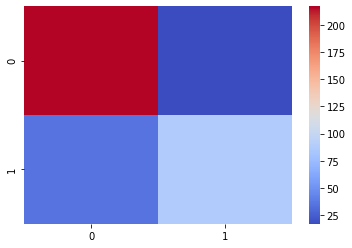

In [60]:
rfc = RandomForestClassifier(n_estimators=55,  oob_score=True,  
                                 random_state=1,  n_jobs=-1, 
                                 max_depth = 3)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy_score = ", accuracy_score(y_test, y_pred))
print('Средняя абсолютная ошибка', mean_absolute_error(y_test, y_pred))
print('Среднеквадратическая ошибка', mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="coolwarm");
rez.append(accuracy_score(y_test, y_pred))

#### Оценка всех алгоритмов

In [61]:
b = ["KNN", "LOG_REG", "TREE_DES", "RAND_FORS"]
pd.DataFrame({'model': b, 'result': rez})

,model,result
0,KNN,0.851541
1,LOG_REG,0.834734
2,TREE_DES,0.857143
3,RAND_FORS,0.854342


Для данного набора признаков наиболее эффективным оказался дерево решений.  
Среди всех наборов признаков эта модель также дала наилучший результат.  
При этом первый набор признаков дал для всех моделей самые плохие результаты, второй - немного лучше, третий - самый хороший.  
Также для всех наборов логистическая регрессия показывала наихудший результат.